In [2]:
import pandas as pd
import seaborn as sns

In [4]:
df = sns.load_dataset("titanic")    # seaborn'da hazır datasetleri varmış bu da onlardan birisi olan titanic

In [5]:
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [6]:
df.isnull().sum()    # Boş olan hücre sayısını gösteriyor.

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Burada eksik değerleri silmek istersek sütün olarak silmek demek 4 tane sütunu ortadan kaldırmak demek oluyor. Satır olarak da silmek istersek yani df.dropna() yazarsak da satır sayımız baya bir azalıyor. Bundan ötürü silmek yerine doldurmak daha iyi olacaktır.

<Axes: xlabel='age', ylabel='Count'>

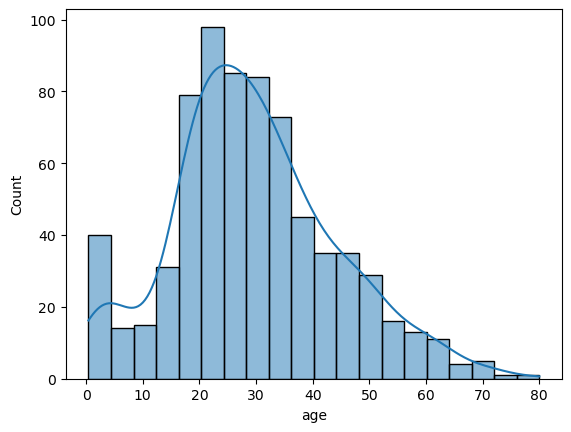

In [8]:
sns.histplot(data = df["age"], kde=True)

Burada df olarak aktardığımız dataframe içerisindeki age sütununun histpolt'unu görüyoruz. Ortalamasını alarak boş verileri dolduracağız.

In [9]:
df["Age_Mean"] = df["age"].fillna(df["age"].mean())

In [10]:
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone   Age_Mean  
0      man        True  NaN  Southampton    no  False  22.000000  
1    woman       False    C    Cherbourg   yes  False  38.000000  
2    woman       False  NaN  Southampton   yes   True  26.000000  
3    woman       False    C  Southampton   yes  False  35.000000  
4      man        True  NaN  Southampton    no   True  35.000000  
..     ...         ...  ...          ...   ...    ...        ...  
886    man        True  NaN  Southampton    no   True  27.000000  
887  woman       False    B  Southampton   yes   True  19.000000  
888  woman       False  NaN  Southampton    no  False  29.699118  
889    man        True    C    Cherbourg   yes   True  26.000000  
890    man        True  NaN   Queenstown    no   True  32.000000  

[891 rows x 16 columns]

In [12]:
df[["Age_Mean","age"]]    # age ve age_mean'i yan yana görmek için böyle yaptım ve görüyorum ki NaN olan değerler 29.69 ile doldurulmuş.

Age_Mean   age
0    22.000000  22.0
1    38.000000  38.0
2    26.000000  26.0
3    35.000000  35.0
4    35.000000  35.0
..         ...   ...
886  27.000000  27.0
887  19.000000  19.0
888  29.699118   NaN
889  26.000000  26.0
890  32.000000  32.0

[891 rows x 2 columns]

Mean ile doldurma yaptık bir de Median ile doldurma yapalım ve görelim değerin kaç olduğunu. Öncesinde boxplota bakacağım.

<Axes: ylabel='age'>

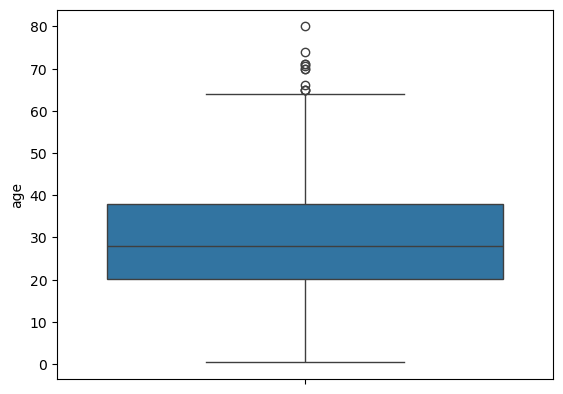

In [13]:
sns.boxplot(data = df["age"])

In [14]:
df["Age_Median"] = df["age"].fillna(df["age"].median())

In [16]:
df[["Age_Median","Age_Mean","age"]]  # Burada görüyoruz ki median kısımları da 28 ile doldurulmuş

Age_Median   Age_Mean   age
0          22.0  22.000000  22.0
1          38.0  38.000000  38.0
2          26.0  26.000000  26.0
3          35.0  35.000000  35.0
4          35.0  35.000000  35.0
..          ...        ...   ...
886        27.0  27.000000  27.0
887        19.0  19.000000  19.0
888        28.0  29.699118   NaN
889        26.0  26.000000  26.0
890        32.0  32.000000  32.0

[891 rows x 3 columns]

-
Mod ile yaptığımız imputation genellikle categorical values için yapılır

In [19]:
df.isnull().sum()   # Gördüğümüz üzere 2 tane embarked değeri boş bunları modunu alarak ona göre dolduracağız.

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
Age_Mean         0
Age_Median       0
dtype: int64

In [21]:
df[df["embarked"].isnull()]   # Böyle diyerek boş olan satırları görebilirim embarked hücrelerinde

survived  pclass     sex   age  sibsp  parch  fare embarked  class  \
61          1       1  female  38.0      0      0  80.0      NaN  First   
829         1       1  female  62.0      0      0  80.0      NaN  First   

       who  adult_male deck embark_town alive  alone  Age_Mean  Age_Median  
61   woman       False    B         NaN   yes   True      38.0        38.0  
829  woman       False    B         NaN   yes   True      62.0        62.0

In [22]:
df["embarked"].unique()  # Burada embarked hücrelerinin doldurulduğu değerlere erişebiliyoruz.

array(['S', 'C', 'Q', nan], dtype=object)

In [24]:
df[df["embarked"].notna()]["embarked"].mode()   # Burada yaptığımız işlem boş olmayan embarked satırlarının modunu almak oldu.

0    S
Name: embarked, dtype: object

In [25]:
mode_value = df[df["embarked"].notna()]["embarked"].mode()[0]

In [26]:
mode_value

'S'

In [27]:
df["Embarked_Mode"] = df["embarked"].fillna(mode_value)

In [28]:
df["embarked"].isnull().sum()

2

In [29]:
df["Embarked_Mode"].isnull().sum()

0